Data description
Number of examples
train: 891
test: 418


Number of features: 11

Number of examples per class
Survived
0    549
1    342
Name: count, dtype: int64

Descriptive statistics
Age
mean: 29.36
median: 28.00
standard deviation: 13.02

Visualization Charts


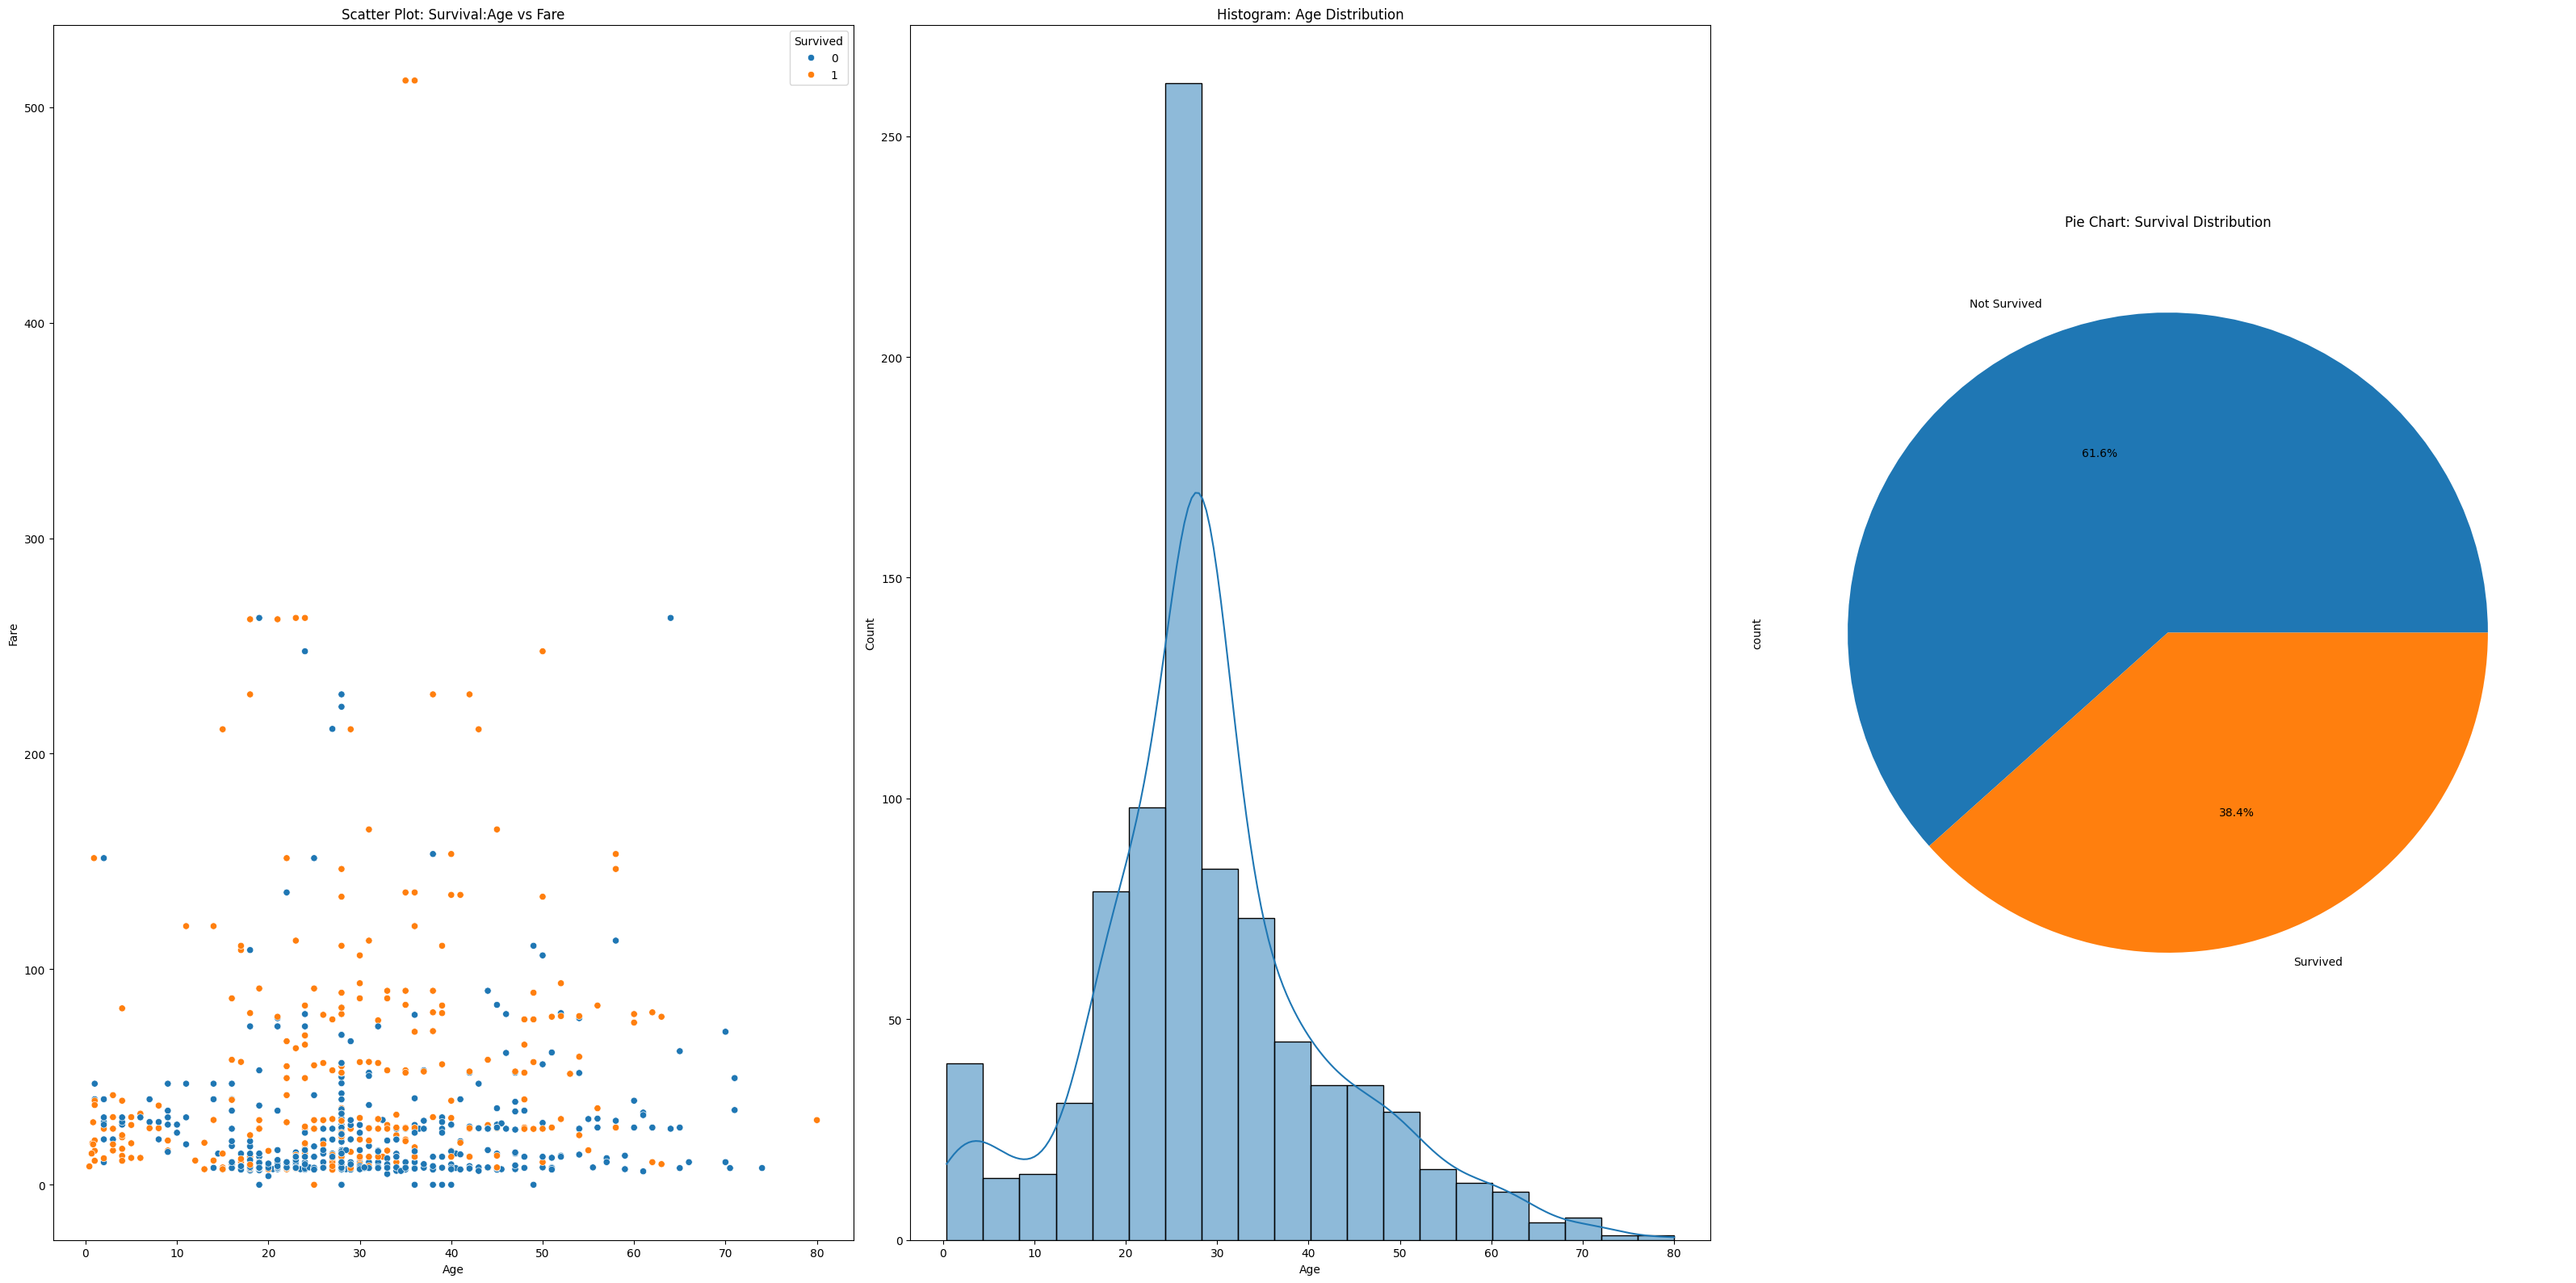


Train size: 623, Validation size: 134, Test size: 134

Results


Model 1 - Linear SVC
Accuracy: 0.746268656716418
F1-score: 0.40875912408759124
AUC: 0.4415505013450721


Model 2 - Random Forest Classifier
Accuracy: 0.8134328358208955
F1-score: 0.32
AUC: 0.8257520176082171




/Users/shivamverma/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model 3 - Histogram Gradient Boosting Classifier
Accuracy: 0.835820895522388
F1-score: 0.2828282828282828
AUC: 0.8313768647591099




OSError: [Errno 30] Read-only file system: 'submission.csv'

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

warnings.simplefilter(action='ignore', category=FutureWarning)

train_data = pd.read_csv("/Users/shivamverma/Downloads/titanic/train.csv")
test_data = pd.read_csv("/Users/shivamverma/Downloads/titanic/test.csv")


train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Data Description
print("Data description")
print("================")
print(f"Number of examples\ntrain: {len(train_data)}")
print(f"test: {len(test_data)}")
print("\n")
print(f"Number of features: {train_data.shape[1] - 2}")
print("\nNumber of examples per class")
print(train_data['Survived'].value_counts())

# Descriptive Statistics
print("\nDescriptive statistics")
print("========================")
print(f"Age\nmean: {train_data['Age'].mean():.2f}")
print(f"median: {train_data['Age'].median():.2f}")
print(f"standard deviation: {train_data['Age'].std():.2f}")

print("\nVisualization Charts")
print("========================")
# Data Visualization
plt.figure(figsize=(32, 16))

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(train_data['Age'], kde=True, bins=20)
plt.title("Histogram: Age Distribution")

# Scatter plot
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title("Scatter Plot: Survival:Age vs Fare")

# Pie Chart
plt.subplot(1, 3, 3)
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Survived', 'Survived'])
plt.title("Pie Chart: Survival Distribution")
plt.tight_layout()
plt.show()

# Partioning the data
X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTrain size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

print("\nResults")
print("========================")
print("\n")

#Linear Classifier Start
lSVCmodel = LinearSVC(random_state=42)
lSVCmodel.fit(X_train, y_train)

y_lSVC_pred = lSVCmodel.predict(X_val)
print(f"Model 1 - Linear SVC")
print(f'Accuracy: {accuracy_score(y_val, y_lSVC_pred)}')
print(f'F1-score: {f1_score(y_test, y_lSVC_pred)}')
print(f'AUC: {roc_auc_score(y_test, lSVCmodel.predict_proba(X_test)[:, 1] if hasattr(lSVCmodel, "predict_proba") else y_lSVC_pred)}')
print("\n")
#Linear Classifier End

#RandomForestClassifier Start
rFCModel = RandomForestClassifier(n_estimators=100, random_state=42)
rFCModel.fit(X_train, y_train)

y_rFC_pred = rFCModel.predict(X_val)
print(f"Model 2 - Random Forest Classifier")
print(f'Accuracy: {accuracy_score(y_val, y_rFC_pred)}')
print(f'F1-score: {f1_score(y_test, y_rFC_pred)}')
print(f'AUC: {roc_auc_score(y_test, rFCModel.predict_proba(X_test)[:, 1] if hasattr(rFCModel, "predict_proba") else y_rFC_pred)}')
print("\n")
#RandomForestClassifier End

#HistGradientBoostingClassifier start
hGBCModel = HistGradientBoostingClassifier()
hGBCModel.fit(X_train, y_train)

y__hGBC_pred = hGBCModel.predict(X_val)
print(f"Model 3 - Histogram Gradient Boosting Classifier")
print(f'Accuracy: {accuracy_score(y_val, y__hGBC_pred)}')
print(f'F1-score: {f1_score(y_test, y__hGBC_pred)}')
print(f'AUC: {roc_auc_score(y_test, hGBCModel.predict_proba(X_test)[:, 1] if hasattr(hGBCModel, "predict_proba") else y__hGBC_pred)}')
print("\n")
#HistGradientBoostingClassifier End

X_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_predictions = hGBCModel.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission Saved!")